In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('manufacturing_6G_dataset.csv')

In [2]:
df.head()

,Timestamp,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status
0,2024-01-01 00:00:00,39,Idle,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,Low
1,2024-01-01 00:01:00,29,Active,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,Low
2,2024-01-01 00:02:00,15,Active,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,Low
3,2024-01-01 00:03:00,43,Active,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,Medium
4,2024-01-01 00:04:00,8,Idle,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,Low


In [3]:
df.shape

(100000, 13)

In [4]:
df.dtypes

Timestamp                         object
Machine_ID                         int64
Operation_Mode                    object
Temperature_C                    float64
Vibration_Hz                     float64
Power_Consumption_kW             float64
Network_Latency_ms               float64
Packet_Loss_%                    float64
Quality_Control_Defect_Rate_%    float64
Production_Speed_units_per_hr    float64
Predictive_Maintenance_Score     float64
Error_Rate_%                     float64
Efficiency_Status                 object
dtype: object

In [5]:
df.columns.tolist()

['Timestamp',
 'Machine_ID',
 'Operation_Mode',
 'Temperature_C',
 'Vibration_Hz',
 'Power_Consumption_kW',
 'Network_Latency_ms',
 'Packet_Loss_%',
 'Quality_Control_Defect_Rate_%',
 'Production_Speed_units_per_hr',
 'Predictive_Maintenance_Score',
 'Error_Rate_%',
 'Efficiency_Status']

In [6]:
df.isnull().sum()

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64

In [7]:
df.describe()

,Machine_ID,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.499330,60.041458,2.549959,5.745929,25.555620,2.493418,5.008806,275.916324,0.499385,7.504100
std,14.389439,17.323238,1.414127,2.451271,14.120758,1.443273,2.883666,130.096892,0.288814,4.335896
min,1.000000,30.000138,0.100011,1.500183,1.000025,0.000026,0.000449,50.000375,0.000003,0.000112
25%,13.000000,45.031596,1.323214,3.627318,13.355118,1.245026,2.521591,162.873618,0.248166,3.750148
50%,25.000000,60.033597,2.549441,5.755460,25.536079,2.487667,5.003569,276.648922,0.499209,7.504145
75%,38.000000,74.967217,3.776459,7.860267,37.796372,3.741252,7.506127,388.812761,0.748810,11.273189
max,50.000000,89.998979,4.999974,9.999889,49.999917,4.999975,9.999900,499.996768,0.999978,14.999869


In [8]:
df.groupby('Efficiency_Status').size()

Efficiency_Status
High       2986
Low       77825
Medium    19189
dtype: int64

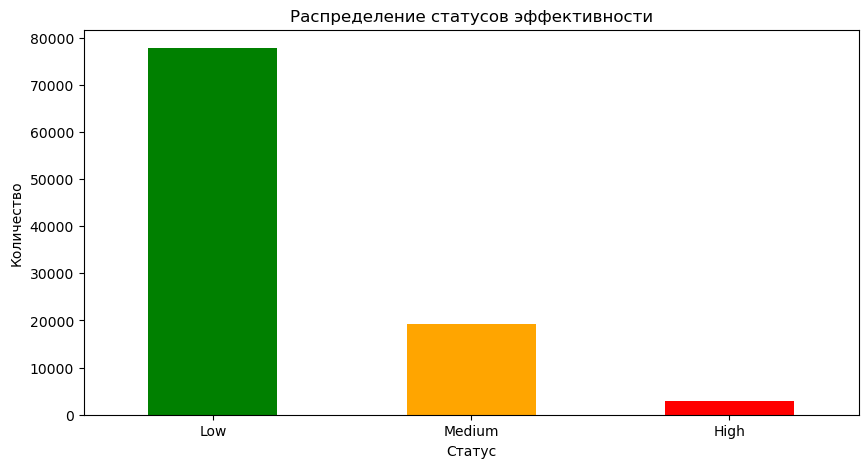

In [9]:
plt.figure(figsize=(10, 5))
df['Efficiency_Status'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Распределение статусов эффективности')
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

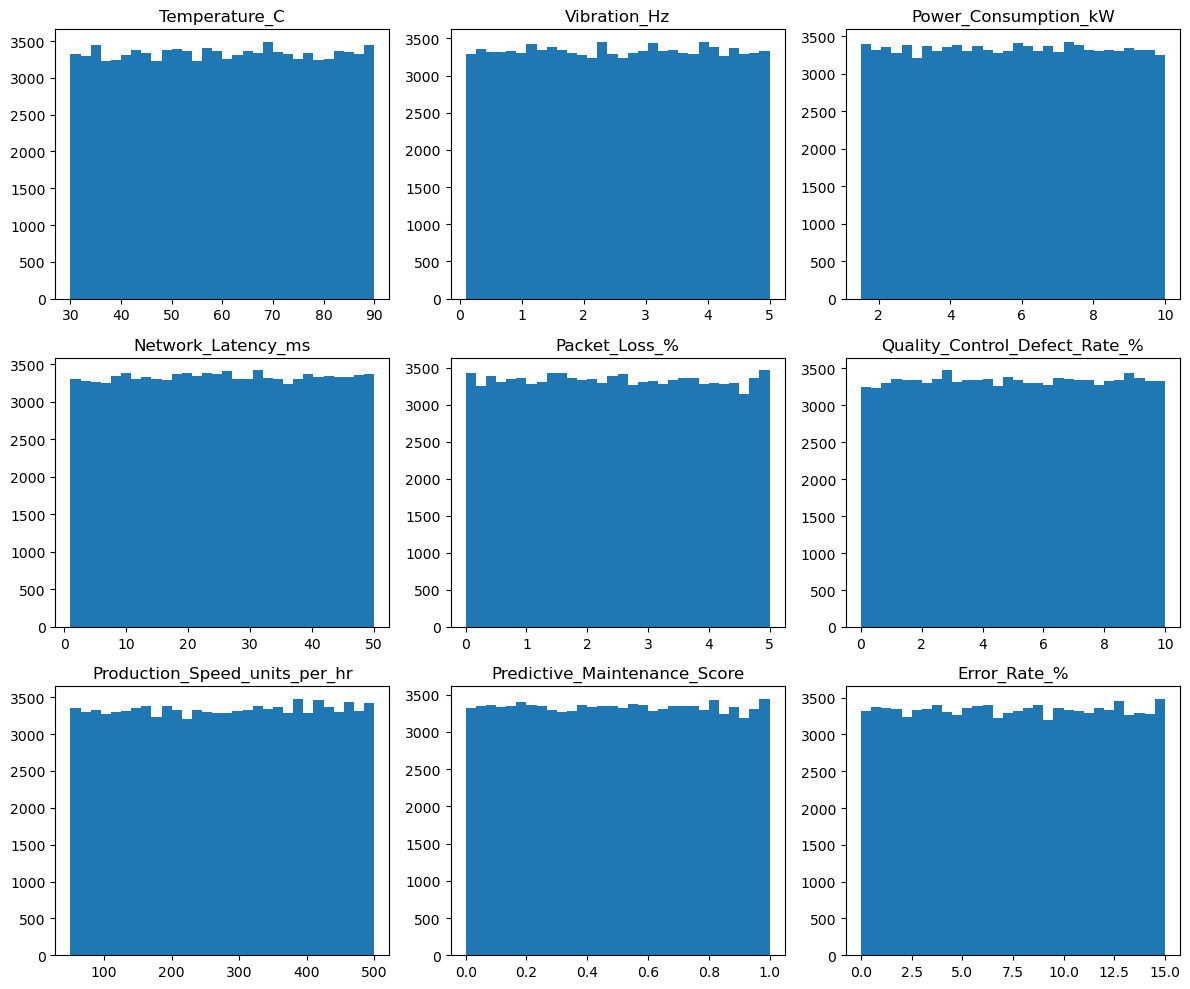

In [10]:
features = [
    'Temperature_C',
    'Vibration_Hz',
    'Power_Consumption_kW', 
    'Network_Latency_ms',
    'Packet_Loss_%',
    'Quality_Control_Defect_Rate_%',
    'Production_Speed_units_per_hr',
    'Predictive_Maintenance_Score',
    'Error_Rate_%'
]

fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # вычисляем позицию в сетке
    axes[row, col].hist(df[feature], bins=30)
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

<Axes: >

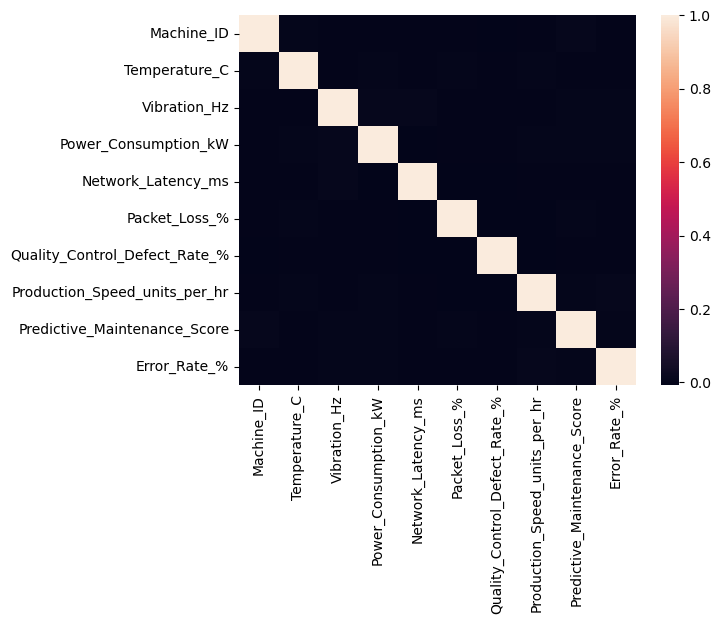

In [11]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

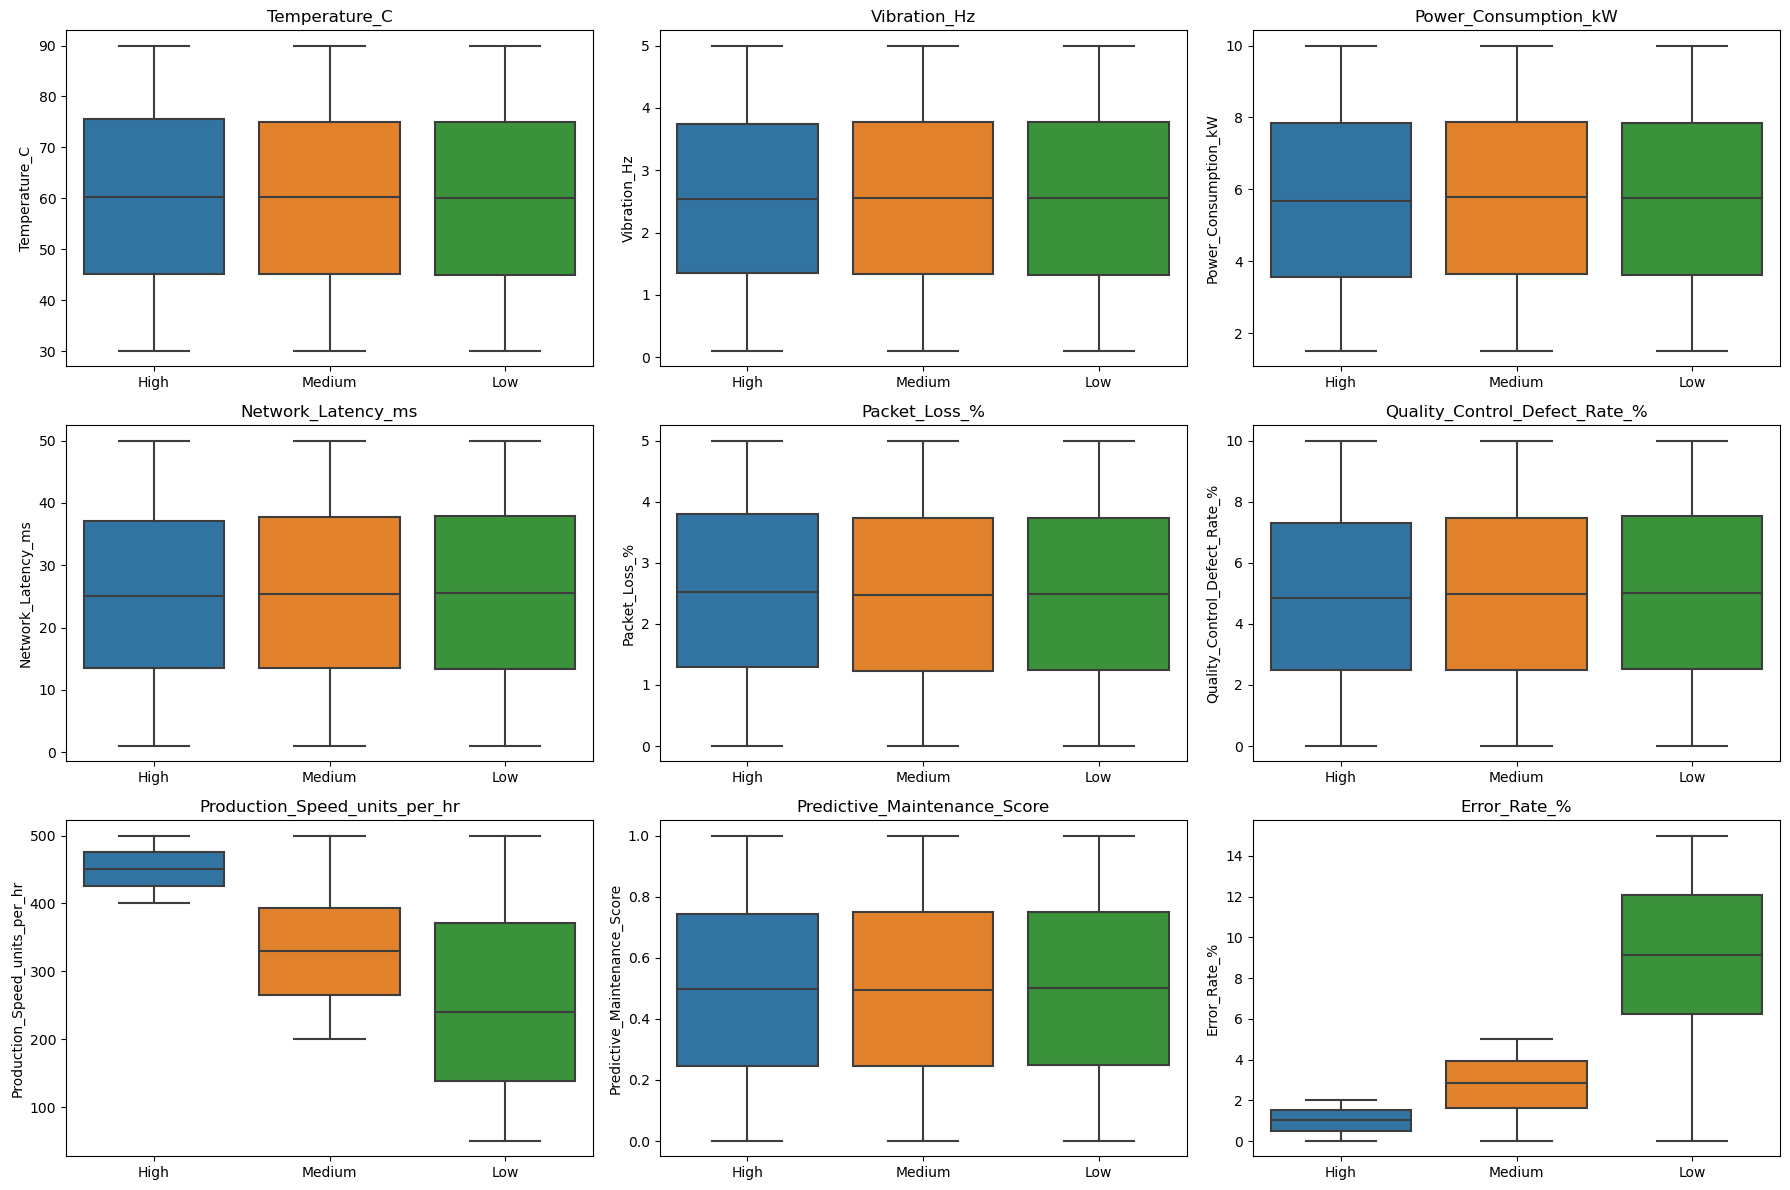

In [12]:
features = [
    'Temperature_C',
    'Vibration_Hz',
    'Power_Consumption_kW',
    'Network_Latency_ms',
    'Packet_Loss_%',
    'Quality_Control_Defect_Rate_%',
    'Production_Speed_units_per_hr',
    'Predictive_Maintenance_Score',
    'Error_Rate_%'
]


fig, axes = plt.subplots(3, 3, figsize=(18, 12))

axes = axes.flatten()

for i, feature in enumerate(features): 
    sns.boxplot(data=df, x='Efficiency_Status', y=feature, 
                order=['High', 'Medium', 'Low'], ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## Анализ данных

### 1. Размер данных
   Строк: 100000
   Столбцов: 13

### 2. Типы данных
-Timestamp                         object  
-Machine_ID                         int64  
Operation_Mode                    object  
Temperature_C                    float64  
Vibration_Hz                     float64  
Power_Consumption_kW             float64  
Network_Latency_ms               float64  
Packet_Loss_%                    float64  
Quality_Control_Defect_Rate_%    float64  
Production_Speed_units_per_hr    float64  
Predictive_Maintenance_Score     float64  
Error_Rate_%                     float64  
Efficiency_Status                 object  
dtype: object

### 3. Пропущенные значения (NaN)
отсутствуют

### 4. Целевая переменная: Efficiency_Status
Распределение Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: Efficiency_Status, dtype: int64

Процентное соотношение:
Low       77.8
Medium    19.2
High       3.0

### 5. Корреляция между признаками близка к нулю

### 6. Распределение
Значения числовых признаков для High, Medium и Low эффективности находятся в практически одинаковых диапазонах, за исключением Production_Speed_units_per_hr, Error_Rate_%.

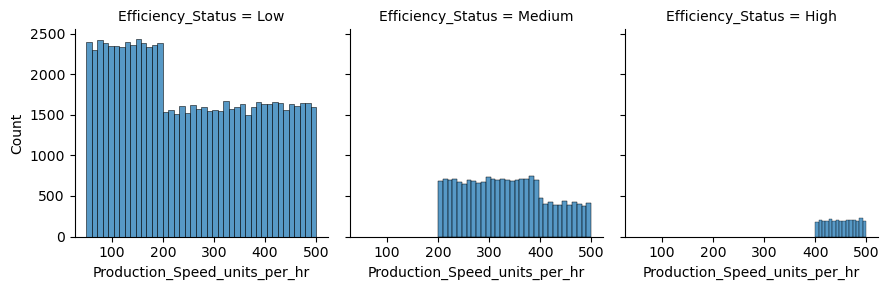

In [13]:
esps = sns.FacetGrid(df, col="Efficiency_Status")
esps.map(sns.histplot, "Production_Speed_units_per_hr")
plt.show()

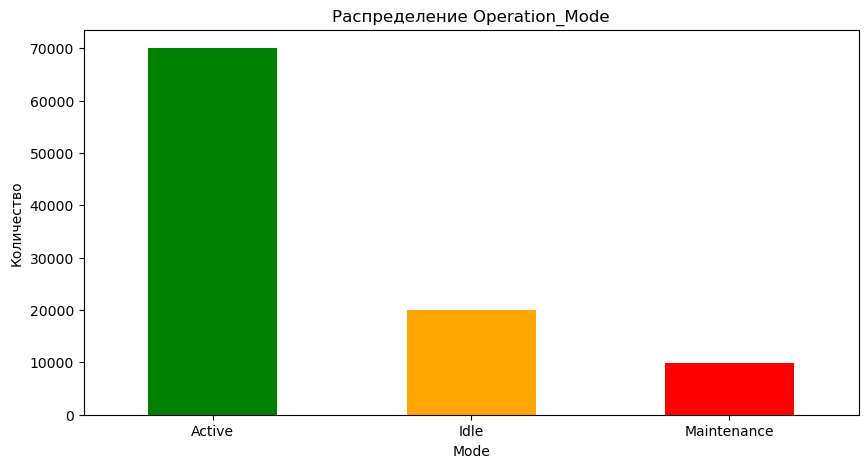

In [14]:
plt.figure(figsize=(10, 5))
df['Operation_Mode'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Распределение Operation_Mode')
plt.xlabel('Mode')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

In [15]:
status_order = ['Low', 'Medium', 'High']
pivot_table = pd.crosstab(df['Operation_Mode'], 
                          df['Efficiency_Status'])[status_order]

pivot_table

Efficiency_Status,Low,Medium,High
Operation_Mode,,,
Active,54434,13496,2124
Idle,15695,3792,570
Maintenance,7696,1901,292


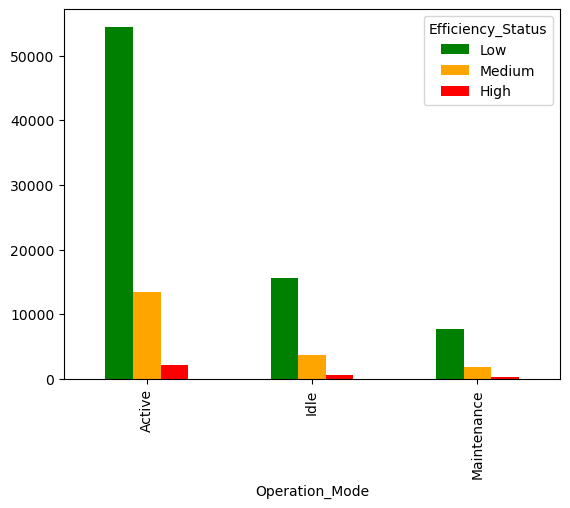

In [16]:
pivot_table.plot(kind='bar',color=['green', 'orange', 'red'])
plt.show()

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

In [18]:
print("Диапазон дат:")
print("  От:", df['Timestamp'].min())
print("  До:", df['Timestamp'].max())
print("  Дней:", (df['Timestamp'].max() - df['Timestamp'].min()).days)
print("  Всего записей:", len(df['Timestamp']))
print("  Уникальных дат/времени:", df['Timestamp'].nunique())

Диапазон дат:
  От: 2024-01-01 00:00:00
  До: 2024-03-10 10:39:00
  Дней: 69
  Всего записей: 100000
  Уникальных дат/времени: 100000


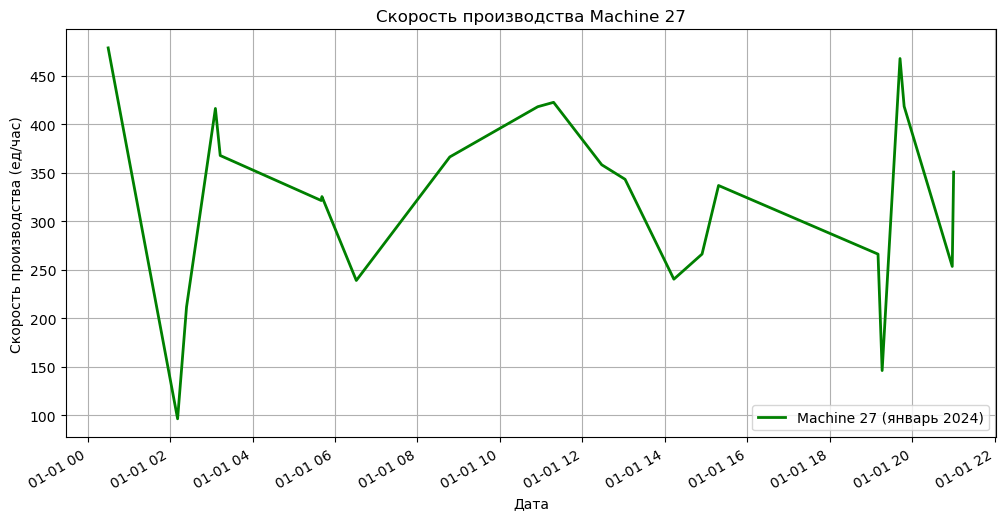

In [19]:
# Рассмотрим скорость производства на примере одной установки
machine_27 = df[df['Machine_ID'] == 27].copy()
machine_27 = machine_27.sort_values('Timestamp')
machine_27_january_1 = machine_27[
    (machine_27['Timestamp'].dt.year == 2024) & 
    (machine_27['Timestamp'].dt.month == 1)& 
    (machine_27['Timestamp'].dt.day == 1)
]

plt.figure(figsize=(12, 6))
plt.plot(machine_27_january_1['Timestamp'], 
         machine_27_january_1['Production_Speed_units_per_hr'],
         label='Machine 27 (январь 2024)',
         color='green',
         linewidth=2)

plt.title('Скорость производства Machine 27')
plt.xlabel('Дата')
plt.ylabel('Скорость производства (ед/час)')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

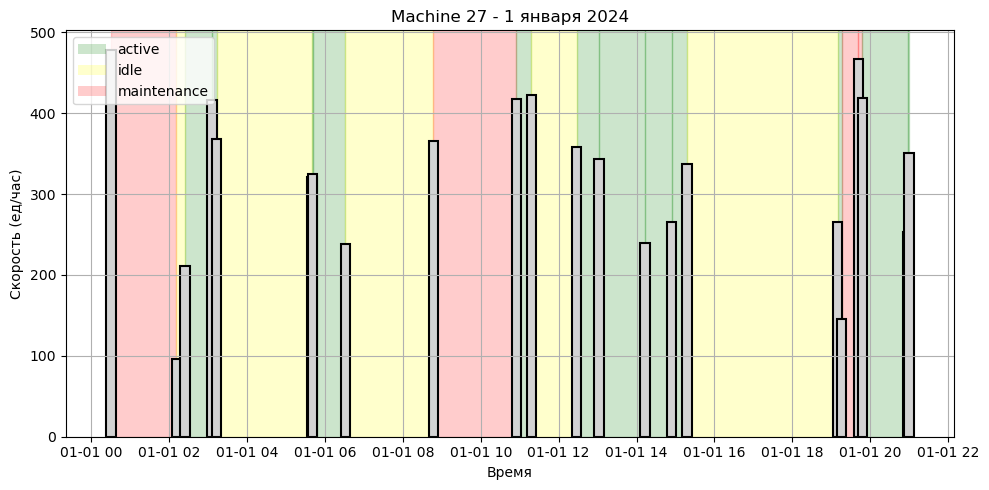

Режимы работы за день:
  Active: 13 записей
  Idle: 5 записей
  Maintenance: 4 записей
Всего записей: 22


In [20]:
# Рассмотрим скорость производства на примере одной установки за 1 день
plt.figure(figsize=(10, 5))

colors = {'active': 'green', 'idle': 'yellow', 'maintenance': 'red'}

for i in range(len(machine_27_january_1)-1):
    start = machine_27_january_1['Timestamp'].iloc[i]
    end = machine_27_january_1['Timestamp'].iloc[i+1]
    mode = machine_27_january_1['Operation_Mode'].iloc[i].lower()
    plt.axvspan(start, end, alpha=0.2, color=colors[mode])

from matplotlib.patches import Patch
legend_patches = []
for mode_name, color in colors.items():
    legend_patches.append(Patch(facecolor=color, alpha=0.2, label=mode_name))

plt.bar(machine_27_january_1['Timestamp'], 
        machine_27_january_1['Production_Speed_units_per_hr'],
        width=0.01, 
        label='Скорость производства',
        color='lightgray',      
        edgecolor='black',      
        linewidth=1.5)     

plt.legend(handles=legend_patches)

plt.title('Machine 27 - 1 января 2024')
plt.xlabel('Время')
plt.ylabel('Скорость (ед/час)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Режимы работы за день:")
mode_counts = machine_27_january_1['Operation_Mode'].value_counts()
for mode, count in mode_counts.items():
    print(f"  {mode}: {count} записей")

print(f"Всего записей: {len(machine_27_january_1)}")


In [21]:
print("Средняя скорость производства по режимам:")
print(df.groupby('Operation_Mode')['Production_Speed_units_per_hr'].agg(['mean', 'min', 'max', 'count']))

Средняя скорость производства по режимам:
                      mean        min         max  count
Operation_Mode                                          
Active          276.199270  50.000375  499.996768  70054
Idle            274.125573  50.031584  499.992056  20057
Maintenance     277.543956  50.027426  499.993348   9889


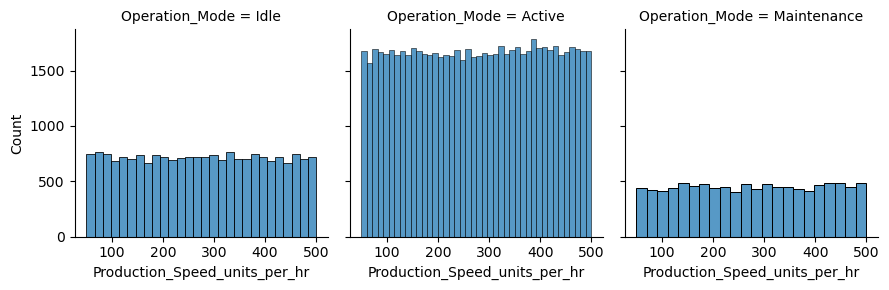

In [22]:
esps = sns.FacetGrid(df, col="Operation_Mode")
esps.map(sns.histplot, "Production_Speed_units_per_hr")
plt.show()

## Обнаружена аномалия в данных

### Проблема:
В режиме **Idle (простой)** и **Maintenance (обслуживание)** зафиксирована скорость производства до 500 ед/час

### Возможные причины:
1. **Ошибка записи режима** 
2. **Задержка данных** - продукция выходила после остановки линии
3. **Калибровка датчиков** - некорректные показания

In [23]:
def detect_all_outliers(df, columns=None):
    """
    Находит выбросы для числовых колонок
    """
   
    outliers_summary = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outliers_summary[col] = {
            'count': len(outliers),
            'percent': len(outliers)/len(df)*100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min': df[col].min(),
            'max': df[col].max(),
            'outliers_indices': outliers.index.tolist()
        }
    
    return outliers_summary

features = [
    'Temperature_C', 'Vibration_Hz', 'Power_Consumption_kW',
    'Network_Latency_ms', 'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
    'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score', 'Error_Rate_%'
]

outliers_info = detect_all_outliers(df, [f for f in features if f in df.columns])

print("Выбросы:")
print("="*70)
for col, info in outliers_info.items():
    print(f"{col:30}: {info['count']:3} выбросов ({info['percent']:5.1f}%) "
          f"[{info['lower_bound']:6.1f}, {info['upper_bound']:6.1f}]")

Выбросы:
Temperature_C                 :   0 выбросов (  0.0%) [   0.1,  119.9]
Vibration_Hz                  :   0 выбросов (  0.0%) [  -2.4,    7.5]
Power_Consumption_kW          :   0 выбросов (  0.0%) [  -2.7,   14.2]
Network_Latency_ms            :   0 выбросов (  0.0%) [ -23.3,   74.5]
Packet_Loss_%                 :   0 выбросов (  0.0%) [  -2.5,    7.5]
Quality_Control_Defect_Rate_% :   0 выбросов (  0.0%) [  -5.0,   15.0]
Production_Speed_units_per_hr :   0 выбросов (  0.0%) [-176.0,  727.7]
Predictive_Maintenance_Score  :   0 выбросов (  0.0%) [  -0.5,    1.5]
Error_Rate_%                  :   0 выбросов (  0.0%) [  -7.5,   22.6]


# Выбросы

Выбросы отсутствуют.

### Возможные причины:
1. Стабильное производство 
2. Данные очищены
3. Синтетический датасет

In [24]:
# Преобразуем категориальные колонки Efficiency_Status и Operation_Mode
df_encoded = df.copy()

df_encoded['Efficiency_Status'] = df_encoded['Efficiency_Status'].map(
    {'Low': 0, 'Medium': 1, 'High': 2}
)

df_encoded = pd.get_dummies(df_encoded, columns=['Operation_Mode'], prefix='Mode')

# Удалим колонку Timestamp
df_encoded = df_encoded.drop(['Timestamp', 'Machine_ID'], axis=1)

df_encoded.head()

,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status,hour,day_of_week,is_weekend,Mode_Active,Mode_Idle,Mode_Maintenance
0,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,0,0,0,0,0,1,0
1,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,0,0,0,0,1,0,0
2,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,0,0,0,0,1,0,0
3,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,1,0,0,0,1,0,0
4,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,0,0,0,0,0,1,0


In [25]:
correlations = df_encoded.corr()['Efficiency_Status'].abs().sort_values(ascending=False)
print(correlations.head(10))

Efficiency_Status                1.000000
Error_Rate_%                     0.603703
Production_Speed_units_per_hr    0.333587
hour                             0.007222
Quality_Control_Defect_Rate_%    0.005892
Mode_Idle                        0.005744
Mode_Active                      0.005161
Temperature_C                    0.003824
Predictive_Maintenance_Score     0.003352
day_of_week                      0.003097
Name: Efficiency_Status, dtype: float64


In [26]:
# Удалим колонку Error_Rate_%, поскольку высока корреляция с целевой переменной
df_encoded = df_encoded.drop(['Error_Rate_%'], axis=1)

In [27]:
#Используем RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df_encoded.drop('Efficiency_Status', axis=1)  
y = df_encoded['Efficiency_Status']              

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',  
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Результаты RandomForest:")
print("="*60)
print(classification_report(y_test, y_pred,
                          target_names=['Low', 'Medium', 'High'],
                          zero_division=0))

print("\nПроверка распределения предсказаний:")
pred_counts = pd.Series(y_pred).value_counts().sort_index()
for cls, count in pred_counts.items():
    label = ['Low', 'Medium', 'High'][cls]
    print(f"  {label}: {count} предсказаний")

Результаты RandomForest:
              precision    recall  f1-score   support

         Low       0.78      1.00      0.88     15565
      Medium       0.14      0.00      0.00      3838
        High       0.00      0.00      0.00       597

    accuracy                           0.78     20000
   macro avg       0.31      0.33      0.29     20000
weighted avg       0.63      0.78      0.68     20000


Проверка распределения предсказаний:
  Low: 19993 предсказаний
  Medium: 7 предсказаний


In [29]:
# Агрессивная балансировка
class_weights_aggressive = {
    0: 1.0,   # Low
    1: 5.0,   # Medium
    2: 20.0   # High
}

model_aggressive = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=50,
    min_samples_leaf=20,
    class_weight=class_weights_aggressive,
    random_state=42
)

model_aggressive.fit(X_train, y_train)

y_proba = model_aggressive.predict_proba(X_test)

# Адаптивные пороги
y_pred_balanced = []
for proba in y_proba:
    if proba[2] > 0.1:  # 10% вероятность High - High
        y_pred_balanced.append(2)
    elif proba[1] > 0.3:  # 30% вероятность Medium - Medium
        y_pred_balanced.append(1)
    else:
        y_pred_balanced.append(0)

print("С агрессивной балансировкой:")
print("="*60)
print(classification_report(y_test, y_pred_balanced, 
                          target_names=['Low', 'Medium', 'High']))

С агрессивной балансировкой:
              precision    recall  f1-score   support

         Low       1.00      0.43      0.60     15565
      Medium       0.33      0.76      0.46      3838
        High       0.13      1.00      0.23       597

    accuracy                           0.51     20000
   macro avg       0.49      0.73      0.43     20000
weighted avg       0.85      0.51      0.56     20000



### Анализ базовой модели Random Forest (без балансировки)
Проблема сильного дисбаланса классов: Модель практически всегда предсказывает класс Low (15565 из 20000 истинных примеров), так как он доминирует в данных.

Low: Precision=0.78, Recall=1.00 — модель хорошо угадывает класс Low, но это достигается за счёт игнорирования остальных классов.

Medium и High: Precision и Recall близки к нулю — эти классы модель почти не распознаёт.

### Анализ модели Random Forest с агрессивной балансировкой
High: Recall=1.00 — модель теперь находит все классы High (но Precision=0.13, много ложных срабатываний).

Medium: Recall вырос до 0.76 (было 0.00).

Low: Recall упал до 0.43, но Precision стал идеальным (1.00).

### Итог:
Балансировка классов существенно улучшила способность модели обнаруживать редкие классы (Medium и High). Но получили высокий уровень ложных срабатываний для классов High (Precision=0.13) и Medium (Precision=0.33). Общая точность (Accuracy) стала низкой.
Рассмотрим дургие алгоритмы.

In [37]:
#Используем XGBoost
import xgboost as xgb
X = df_encoded.drop('Efficiency_Status', axis=1)
y = df_encoded['Efficiency_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  
)

# ОСНОВНАЯ МОДЕЛЬ: XGBoost с балансировкой классов
print("\n" + "="*60)
print("МОДЕЛЬ 1: Базовый XGBoost")
print("="*60)

# Базовый XGBoost без балансировки
model_basic = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    verbosity=0
)

model_basic.fit(X_train, y_train)
y_pred_basic = model_basic.predict(X_test)

print(classification_report(y_test, y_pred_basic,
                          target_names=['Low', 'Medium', 'High'],
                          zero_division=0))

# УЛУЧШЕННАЯ МОДЕЛЬ: С балансировкой классов

print("\n" + "="*60)
print("МОДЕЛЬ 2: XGBoost с балансировкой классов")
print("="*60)

# Рассчитываем веса для классов (обратно пропорционально частоте)
class_counts = y_train.value_counts()
total_samples = len(y_train)

class_weights = {}
for cls in [0, 1, 2]:
    class_weights[cls] = total_samples / (len(class_counts) * class_counts[cls])

print("Веса классов для балансировки:")
for cls, name in enumerate(['Low', 'Medium', 'High']):
    print(f"  {name}: {class_weights[cls]:.2f}")

# Создаем веса для каждого примера в тренировочной выборке
sample_weights = np.array([class_weights[y] for y in y_train])

# Улучшенный XGBoost с балансировкой
model_balanced = xgb.XGBClassifier(
    random_state=42,
    n_estimators=150,  
    max_depth=4,       
    learning_rate=0.05, 
    subsample=0.8,     
    colsample_bytree=0.8, 
    min_child_weight=2, 
    use_label_encoder=False,
    verbosity=0
)

model_balanced.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    verbose=False
)

y_pred_balanced = model_balanced.predict(X_test)

print("\nРезультаты улучшенной модели:")
print(classification_report(y_test, y_pred_balanced,
                          target_names=['Low', 'Medium', 'High'],
                          zero_division=0))






МОДЕЛЬ 1: Базовый XGBoost
              precision    recall  f1-score   support

         Low       0.78      1.00      0.88     15565
      Medium       0.50      0.00      0.00      3838
        High       0.00      0.00      0.00       597

    accuracy                           0.78     20000
   macro avg       0.43      0.33      0.29     20000
weighted avg       0.70      0.78      0.68     20000


МОДЕЛЬ 2: XGBoost с балансировкой классов
Веса классов для балансировки:
  Low: 0.43
  Medium: 1.74
  High: 11.16

Результаты улучшенной модели:
              precision    recall  f1-score   support

         Low       1.00      0.43      0.60     15565
      Medium       0.33      0.76      0.46      3838
        High       0.13      1.00      0.23       597

    accuracy                           0.51     20000
   macro avg       0.49      0.73      0.43     20000
weighted avg       0.84      0.51      0.56     20000



In [39]:
print("\n" + "="*60)
print("ВАЖНОСТЬ ПРИЗНАКОВ (модель с балансировкой)")
print("="*60)

# Получаем важность признаков
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': model_balanced.feature_importances_
})

# Сортируем по важности
feature_importance = feature_importance.sort_values('Важность', ascending=False)

for i, row in feature_importance.head(10).iterrows():
    print(f"  {row['Признак']}: {row['Важность']:.4f}")



ВАЖНОСТЬ ПРИЗНАКОВ (модель с балансировкой)
  Production_Speed_units_per_hr: 0.8664
  Mode_Maintenance: 0.0132
  Power_Consumption_kW: 0.0119
  Quality_Control_Defect_Rate_%: 0.0109
  Network_Latency_ms: 0.0108
  Vibration_Hz: 0.0107
  Predictive_Maintenance_Score: 0.0106
  Packet_Loss_%: 0.0106
  Temperature_C: 0.0105
  Mode_Active: 0.0103


### Анализ базовой модели XGBoost (без балансировки)
Проблема: Модель предсказывает только класс Low (Recall = 1.00)

Accuracy 78%, т.к. отражает долю преобладающего класса

Medium и High классы не распознаются

### Анализ модели XGBoost с балансировкой

High класс: Recall улучшился с 0.00 до 1.00

Precision низкий 0.13

Medium класс: Recall вырос с 0.00 до 0.76

Low класс: Precision  достиг 1.00


In [43]:
#Рассмотрим для сравнения логистическую регрессию
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = df_encoded.drop('Efficiency_Status', axis=1)
y = df_encoded['Efficiency_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*60)
print("МОДЕЛЬ 1: Базовая логистическая регрессия (без балансировки)")
print("="*60)

logreg_basic = LogisticRegression(
    max_iter=1000,  
    random_state=42,
    n_jobs=-1
)

logreg_basic.fit(X_train_scaled, y_train)
y_pred_basic = logreg_basic.predict(X_test_scaled)

print(classification_report(y_test, y_pred_basic,
                          target_names=['Low', 'Medium', 'High'],
                          zero_division=0))

print("\n" + "="*60)
print("МОДЕЛЬ 2: Логистическая регрессия с балансировкой классов")
print("="*60)

logreg_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)

logreg_balanced.fit(X_train_scaled, y_train)
y_pred_balanced = logreg_balanced.predict(X_test_scaled)

print(classification_report(y_test, y_pred_balanced,
                          target_names=['Low', 'Medium', 'High'],
                          zero_division=0))





МОДЕЛЬ 1: Базовая логистическая регрессия (без балансировки)
              precision    recall  f1-score   support

         Low       0.78      1.00      0.88     15565
      Medium       0.00      0.00      0.00      3838
        High       0.00      0.00      0.00       597

    accuracy                           0.78     20000
   macro avg       0.26      0.33      0.29     20000
weighted avg       0.61      0.78      0.68     20000


МОДЕЛЬ 2: Логистическая регрессия с балансировкой классов
              precision    recall  f1-score   support

         Low       0.88      0.61      0.72     15565
      Medium       0.33      0.44      0.37      3838
        High       0.13      0.89      0.23       597

    accuracy                           0.59     20000
   macro avg       0.45      0.65      0.44     20000
weighted avg       0.75      0.59      0.64     20000



### Сравнение моделей Random Forest, XGBoost, Logistic Regression с балансировкой
#### 1. XGBoost и RandomForest
Оба алгоритма показывают практически идентичные результаты после балансировки классов:
- **Low класс**: Precision=1.00, Recall=0.43, F1=0.60
- **Medium класс**: Precision=0.33, Recall=0.76, F1=0.46  
- **High класс**: Precision=0.13, Recall=1.00, F1=0.23
- **Accuracy**: 0.51
- **Macro avg**: Precision=0.49, Recall=0.73, F1=0.43


#### 2. Logistic Regression с балансировкой классов
Логистическая регрессия показывает другой баланс метрик:
- **Low класс**: Precision=0.88, Recall=0.61, F1=0.72
- **Medium класс**: Precision=0.33, Recall=0.44, F1=0.37  
- **High класс**: Precision=0.13, Recall=0.89, F1=0.23
- **Accuracy**: 0.59
- **Macro avg**: Precision=0.45, Recall=0.65, F1=0.44

#### 3. Основные выводы

1. **Балансировка классов оказалась важнее выбора алгоритма** - все модели значительно улучшились после её применения
2. **Ансамблевые методы (RF, XGBoost)** лучше обнаруживают редкие классы
3. **Линейная модель (Logistic Regression)** даёт более сбалансированный результат по всем классам